In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
dataset = pd.read_csv(r'E:\Python\data\titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [4]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
remove_cols = [
    'PassengerId',
    'Name' ,
    'Ticket',
    'Cabin',
    'Embarked'
]
data = dataset.drop(remove_cols,axis =1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [6]:
mapping_sex = {
    'male' : 0 ,
    'female' : 1
}
data.Sex = data.Sex.map(mapping_sex)

In [7]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [8]:
data = data.dropna()
print(data.shape)
data.describe()

(714, 7)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


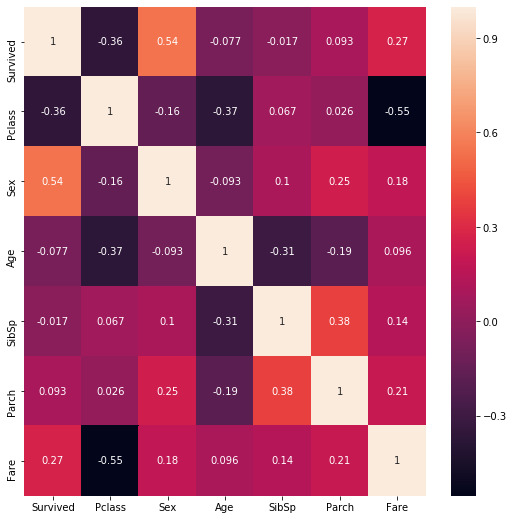

In [9]:
plt.figure(figsize = (9,9))
sns.heatmap(data.corr(),annot = True)

In [10]:
y = data.Survived
X = data.drop('Survived',axis = 1)

In [11]:
print(X)

     Pclass  Sex   Age  SibSp  Parch      Fare
0         3    0  22.0      1      0    7.2500
1         1    1  38.0      1      0   71.2833
2         3    1  26.0      0      0    7.9250
3         1    1  35.0      1      0   53.1000
4         3    0  35.0      0      0    8.0500
6         1    0  54.0      0      0   51.8625
7         3    0   2.0      3      1   21.0750
8         3    1  27.0      0      2   11.1333
9         2    1  14.0      1      0   30.0708
10        3    1   4.0      1      1   16.7000
11        1    1  58.0      0      0   26.5500
12        3    0  20.0      0      0    8.0500
13        3    0  39.0      1      5   31.2750
14        3    1  14.0      0      0    7.8542
15        2    1  55.0      0      0   16.0000
16        3    0   2.0      4      1   29.1250
18        3    1  31.0      1      0   18.0000
20        2    0  35.0      0      0   26.0000
21        2    0  34.0      0      0   13.0000
22        3    1  15.0      0      0    8.0292
23        1  

In [12]:
print(y)

0      0
1      1
2      1
3      1
4      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
18     0
20     0
21     1
22     1
23     1
24     0
25     1
27     0
30     0
33     0
34     0
35     0
37     0
38     0
      ..
856    1
857    1
858    1
860    0
861    0
862    1
864    0
865    1
866    1
867    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y ,test_size = 0.2,random_state = 2 )

In [14]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(571, 6) (143, 6) (571,) (143,)


In [15]:
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier(n_estimators = 100)
Rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
score = Rf.score(x_test,y_test)
print(score)

0.7972027972027972


In [17]:
test_vector = np.array([3,1,26.0,0,0,7.9250])
test_vector = np.reshape(test_vector,(1,6))
print(test_vector)
test_vector.shape

[[ 3.     1.    26.     0.     0.     7.925]]


(1, 6)

In [18]:
Y_pred = Rf.predict(test_vector)
print(Y_pred)

[1]


In [19]:
y_pred = Rf.predict(x_test)

cmp = np.array([y_pred,y_test])
cmp = cmp.reshape(len(y_pred),2)
print(cmp)

[[0 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]

In [20]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[77 16]
 [13 37]]


Text(0.5, 1, 'Accuracy Score: 0.7972027972027972')

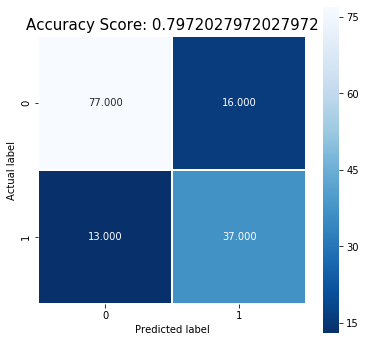

In [21]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)